# **Algoritmos de busca**

Implemente os algoritmos de busca a seguir:
*   Busca em **profundidade**
*   Busca em **largura**
*   Busca de **custo mínimo**
*   Busca ***Best First***
*   Busca **A***

Para isso, utilize como base este arquivo e a figura apresentada abaixo. A estrutura do grafo está representada por meio de dicionário. Considere como nó de início **"o103"** e nó objetivo **"r123"**.

**Observação:** Para os algoritmos **Best First** e **A*** será necessária a definição de uma função heurística (com valores diferentes do apresentado em sala!)
 
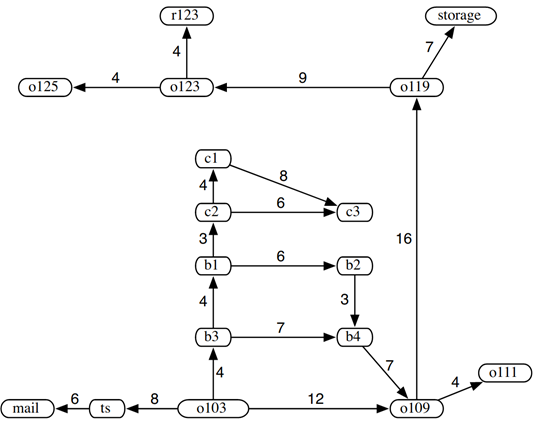

## Busca em largura

In [76]:


def buscaEmLargura(grafo, no_inicial, no_destino):
    #inicialmente a fronteira eh composta pelo no inicial da busca
    fronteira = [no_inicial]

    print("\nIniciando Busca\n\n")
    
    print("Fronteira: ", fronteira)

    goal = no_destino

    #enquanto a fronteira nao estiver vazia
    while fronteira:
      #remove-se o elemento da frente da lista
      encontrado = fronteira.pop(0)

      # E eh conferido se ele eh o objetivo
      if goal == encontrado:
        #entao eh retornado o elemento encontrado 
        return encontrado

      #para cada vizinho de do vertice encontrado
      #grafo[encontrado] retorna um dicionario
      # .keys() retorna o nome dos vertices adjacentes
      for vertice in grafo[encontrado].keys():
        fronteira.append(vertice) # adiciona ao final da fila
        
      print("Fronteira: ", fronteira)

    return "Nao Encontrado" 


In [77]:
#outra busca mais eficiente
#foi percebido que um mesmo vertice pode ser visitado mais de uma vez
#essa busca em largura também nao mostra o caminho

def mostrar_caminho(caminho, no_destino):
  caminhagem = []

  while no_destino:
    caminhagem.append(no_destino)
    no_destino = caminho[no_destino]
    
  return caminhagem[::-1]

def buscaEmLargura2(grafo, no_inicial, no_destino):
    #inicialmente a fronteira eh composta pelo no inicial da busca
    fronteira = [no_inicial]
    #dicionario de vertices visitados
    visitados = {no_inicial:1}
    #de onde vem um vertice
    caminho ={no_inicial: None}

    print("\nIniciando Busca\n\n")

    print("Fronteira: ", fronteira)

    goal = no_destino

    #enquanto a fronteira nao estiver vazia
    while fronteira:
      #remove-se o elemento da frente da lista
      encontrado = fronteira.pop(0)

      # E eh conferido se ele eh o objetivo
      if goal == encontrado:
        #entao eh retornado o elemento encontrado 
        #e o caminho para chegar ate ele
        return encontrado , mostrar_caminho(caminho, no_destino)

      #para cada vizinho de do vertice encontrado
      #grafo[encontrado] retorna um dicionario
      # .keys() retorna o nome dos vertices adjacentes
      for vertice in grafo[encontrado].keys():
        #se esse vertice ja nao estiver sido visitado
        if not visitados.get(vertice):
          fronteira.append(vertice) # adiciona ao final da fila
          visitados[vertice] = 1 #e ele eh marcado como visitado
          caminho[vertice] = encontrado # adiciona o pai do vertice
      print("Fronteira: ", fronteira)

    return "Nao Encontrado" 


    

# Busca em profundidade


In [78]:
def buscaEmProfundidade(grafo, no_inicial, no_destino):
  #inicialmente a fronteira eh composta pelo no inicial da busca
  fronteira = [no_inicial]

  print("\nIniciando Busca\n\n")
  
  print("Fronteira: ", fronteira)
  goal = no_destino

  #enquanto a fronteira nao estiver vazia
  while fronteira:
    #remove-se o elemento da fpilha
    encontrado = fronteira.pop(0)
    # E eh conferido se ele eh o objetivo
    if goal == encontrado:
      return encontrado

    #para cada vizinho de do vertice encontrado
    #grafo[encontrado] retorna um dicionario
    # .keys() retorna o nome dos vertices adjacentes

    for vertice in grafo[encontrado].keys():
      fronteira.insert(0,vertice) # adiciona ao final da pilha
    print("Fronteira: ", fronteira)
  return "Nao Encontrado"

In [79]:
#outra busca mais eficiente
#foi percebido que um mesmo vertice pode ser visitado mais de uma vez
#essa busca em profundidade também nao mostra o caminho

def mostrar_caminho(caminho, no_destino):
  caminhagem = []

  while no_destino:
    caminhagem.append(no_destino)
    no_destino = caminho[no_destino]
    
  return caminhagem[::-1]

def buscaEmProfundidade2(grafo, no_inicial, no_destino):
    #inicialmente a fronteira eh composta pelo no inicial da busca
    fronteira = [no_inicial]
    #dicionario de vertices visitados
    visitados = {no_inicial:1}
    #de onde vem um vertice
    caminho ={no_inicial: None}

    print("\nIniciando Busca\n\n")
    print("Fronteira: ", fronteira)

    goal = no_destino

    #enquanto a fronteira nao estiver vazia
    while fronteira:
      #remove-se o elemento da frente da lista
      encontrado = fronteira.pop(0)

      # E eh conferido se ele eh o objetivo
      if goal == encontrado:
        #entao eh retornado o elemento encontrado 
        #e o caminho para chegar ate ele
        return encontrado , mostrar_caminho(caminho, no_destino)

      #para cada vizinho de do vertice encontrado
      #grafo[encontrado] retorna um dicionario
      # .keys() retorna o nome dos vertices adjacentes
      for vertice in grafo[encontrado].keys():
        #se esse vertice ja nao estiver sido visitado
        if not visitados.get(vertice):
          fronteira.insert(0,vertice) # adiciona ao final da fila
          visitados[vertice] = 1 #e ele eh marcado como visitado
          caminho[vertice] = encontrado # adiciona o pai do vertice
      print("Fronteira: ", fronteira)

    return "Nao Encontrado" 

# Busca com custo mínimo

Nesta implementação vamos utilizar uma fila de prioridade.
Vamos sempre remover da lista o vertice com menor valor de custo.


In [80]:
def heuristica(grafo, no_inicial, no_destino):
  #a heuristica vai rodar uma busca em largura
  #os vertices do caminho da busca terao o peso 1
  #e os vertices que nao estao no caminho terao peso
  # do tamanho da media dos pesos dos arcos

  quantidade_de_arcos = 0
  soma = 0

  for dicionario in grafo.values():
    for value in dicionario.values():
      soma += value
      quantidade_de_arcos +=1
  
  media = soma/quantidade_de_arcos


  _, caminho = buscaEmLargura2(grafo, no_inicial, no_destino)
  
  tabela_heuristica = {}
  for vertice in grafo.keys():
    tabela_heuristica[vertice] = media

  for vertice in caminho:
    tabela_heuristica[vertice] = 1

  tabela_heuristica[no_destino] = 0

  return tabela_heuristica
  
  

In [81]:
def buscaCustoMinimo(grafo, no_inicial, no_destino):
    #inicialmente a fronteira eh composta pelo no inicial da busca e seu peso
    fronteira = [(no_inicial, 0)]

    print("\nIniciando Busca\n\n")
    print("Fronteira: ", fronteira)

    goal = no_destino

    #enquanto a fronteira nao estiver vazia
    while fronteira:
      #remove-se o elemento da frente da lista de prioridade
      encontrado = fronteira.pop(0)

      # E eh conferido se ele eh o objetivo
      if goal == encontrado[0]:
        #entao eh retornado o elemento encontrado 
        return encontrado[0]

      #para cada vizinho de do vertice encontrado
      #grafo[encontrado] retorna um dicionario
      # .items() retorna o nome dos vertices adjacentes e seus valores
      for vertice, valor in grafo[encontrado[0]].items():
        fronteira.append((vertice, valor+encontrado[1])) # adiciona ao final da fila
      
      #ordena por custo
      fronteira.sort(key=lambda x: x[1])
      print("Fronteira: ", fronteira)

    return "Nao Encontrado"


#Busca *Best First*

In [82]:
def buscaBestFirst(grafo, no_inicial, no_destino):
     #inicialmente a fronteira eh composta pelo no inicial da busca
    fronteira = [no_inicial]

    tabela_heuristica = heuristica(grafo,no_inicial, no_destino)
    print("Tabela Heuristica: ", tabela_heuristica)

    print("\nIniciando Busca\n\n")
    print("Fronteira: ", fronteira)

    goal = no_destino

    #enquanto a fronteira nao estiver vazia
    while fronteira:
      #remove-se o elemento da frente da lista
      encontrado = fronteira.pop(0)

      # E eh conferido se ele eh o objetivo
      if goal == encontrado:
        #entao eh retornado o elemento encontrado 
        return encontrado

      #para cada vizinho de do vertice encontrado
      #grafo[encontrado] retorna um dicionario
      # .keys() retorna o nome dos vertices adjacentes
      for vertice in grafo[encontrado].keys():
        fronteira.append(vertice) # adiciona ao final da fila
      
      #ordena por heuristica
      fronteira.sort(key=lambda x: tabela_heuristica[x])
      print("Fronteira: ", fronteira)

    return "Nao Encontrado" 

#Busca A*

In [75]:
def buscaAStar(grafo,no_inicial, no_destino):
  #inicialmente a fronteira eh composta pelo no inicial da busca e seu peso
    fronteira = [(no_inicial, 0)]

    tabela_heuristica = heuristica(grafo, no_inicial, no_destino)
    print("Tabela Heuristica: ", tabela_heuristica)
    print("\nIniciando Busca\n\n")
    print("Fronteira: ", fronteira)

    goal = no_destino

    #enquanto a fronteira nao estiver vazia
    while fronteira:
      #remove-se o elemento da frente da lista de prioridade
      encontrado = fronteira.pop(0)

      # E eh conferido se ele eh o objetivo
      if goal == encontrado[0]:
        #entao eh retornado o elemento encontrado 
        return encontrado[0]

      #para cada vizinho de do vertice encontrado
      #grafo[encontrado] retorna um dicionario
      # .items() retorna o nome dos vertices adjacentes e seus valores
      for vertice, valor in grafo[encontrado[0]].items():
        fronteira.append((vertice, valor+encontrado[1])) # adiciona ao final da fila
      
      #ordena por custo+heuristica
      fronteira.sort(key=lambda x: x[1]+tabela_heuristica[x[0]])
      print("Fronteira: ", fronteira)

    return "Nao Encontrado"

## Execução dos algoritmos

In [83]:
'''
Definicao do grafo
Vamos utilizar dicionario de dicionarios para representar a formação do grafo
Os vertices serao as chaves do dicionario. Os vizinhos de cada um dos vertices
serao representados por um dicionario com a string do vizinho e o respectivo peso 
(para uso nas buscas com custo minimo ou na utilizacao de heuristicas)
''' 

grafo = {"b1":{"b2": 6, "c2":3},
         "b2":{"b4": 3},
         "b3":{"b1": 4, "b4": 7},
         "b4":{"o109": 7},
         "c1":{"c3": 8},
         "c2":{"c1": 4, "c3":6},
         "c3":{},
         "mail":{},
         "o103":{"ts": 8, "b3": 4, "o109": 12},
         "o109":{"o111": 4, "o119": 16},
         "o111":{},
         "o119":{"storage": 7, "o123": 9},
         "o123":{"r123": 4, "o125": 4},
         "o125":{},
         "r123":{},
         "storage":{},
         "ts":{"mail": 6}
         }

In [84]:
# Teste - busca em largura
print("\n\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\nExecucao de busca em largura\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
buscaEmLargura(grafo,"o103", "r123")




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Execucao de busca em largura
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Iniciando Busca


Fronteira:  ['o103']
Fronteira:  ['ts', 'b3', 'o109']
Fronteira:  ['b3', 'o109', 'mail']
Fronteira:  ['o109', 'mail', 'b1', 'b4']
Fronteira:  ['mail', 'b1', 'b4', 'o111', 'o119']
Fronteira:  ['b1', 'b4', 'o111', 'o119']
Fronteira:  ['b4', 'o111', 'o119', 'b2', 'c2']
Fronteira:  ['o111', 'o119', 'b2', 'c2', 'o109']
Fronteira:  ['o119', 'b2', 'c2', 'o109']
Fronteira:  ['b2', 'c2', 'o109', 'storage', 'o123']
Fronteira:  ['c2', 'o109', 'storage', 'o123', 'b4']
Fronteira:  ['o109', 'storage', 'o123', 'b4', 'c1', 'c3']
Fronteira:  ['storage', 'o123', 'b4', 'c1', 'c3', 'o111', 'o119']
Fronteira:  ['o123', 'b4', 'c1', 'c3', 'o111', 'o119']
Fronteira:  ['b4', 'c1', 'c3', 'o111', 'o119', 'r123', 'o125']
Fronteira:  ['c1', 'c3', 'o111', 'o119', 'r123', 'o125', 'o109']
Fronteira:  ['c3', 'o111', 'o119', 'r123', 'o125', 'o109', 'c3']
Fronteira:  ['o111', 'o1

'r123'

In [85]:
# Teste - busca em largura 2
print("\n\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\nExecucao de busca em largura\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
buscaEmLargura2(grafo,"o103", "r123")




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Execucao de busca em largura
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Iniciando Busca


Fronteira:  ['o103']
Fronteira:  ['ts', 'b3', 'o109']
Fronteira:  ['b3', 'o109', 'mail']
Fronteira:  ['o109', 'mail', 'b1', 'b4']
Fronteira:  ['mail', 'b1', 'b4', 'o111', 'o119']
Fronteira:  ['b1', 'b4', 'o111', 'o119']
Fronteira:  ['b4', 'o111', 'o119', 'b2', 'c2']
Fronteira:  ['o111', 'o119', 'b2', 'c2']
Fronteira:  ['o119', 'b2', 'c2']
Fronteira:  ['b2', 'c2', 'storage', 'o123']
Fronteira:  ['c2', 'storage', 'o123']
Fronteira:  ['storage', 'o123', 'c1', 'c3']
Fronteira:  ['o123', 'c1', 'c3']
Fronteira:  ['c1', 'c3', 'r123', 'o125']
Fronteira:  ['c3', 'r123', 'o125']
Fronteira:  ['r123', 'o125']


('r123', ['o103', 'o109', 'o119', 'o123', 'r123'])

In [86]:
# Teste - busca em profundidade
print("\n\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\nExecucao de busca em profundidade\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
buscaEmProfundidade(grafo,"o103", "r123")




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Execucao de busca em profundidade
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Iniciando Busca


Fronteira:  ['o103']
Fronteira:  ['o109', 'b3', 'ts']
Fronteira:  ['o119', 'o111', 'b3', 'ts']
Fronteira:  ['o123', 'storage', 'o111', 'b3', 'ts']
Fronteira:  ['o125', 'r123', 'storage', 'o111', 'b3', 'ts']
Fronteira:  ['r123', 'storage', 'o111', 'b3', 'ts']


'r123'

In [87]:
# Teste - busca em profundidade 2
print("\n\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\nExecucao de busca em profundidade\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
buscaEmProfundidade2(grafo,"o103", "r123")




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Execucao de busca em profundidade
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Iniciando Busca


Fronteira:  ['o103']
Fronteira:  ['o109', 'b3', 'ts']
Fronteira:  ['o119', 'o111', 'b3', 'ts']
Fronteira:  ['o123', 'storage', 'o111', 'b3', 'ts']
Fronteira:  ['o125', 'r123', 'storage', 'o111', 'b3', 'ts']
Fronteira:  ['r123', 'storage', 'o111', 'b3', 'ts']


('r123', ['o103', 'o109', 'o119', 'o123', 'r123'])

In [88]:
# Teste - busca com custo minimo
print("\n\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\nExecucao de busca com custo minimo\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
buscaCustoMinimo(grafo,"o103", "r123")




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Execucao de busca com custo minimo
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Iniciando Busca


Fronteira:  [('o103', 0)]
Fronteira:  [('b3', 4), ('ts', 8), ('o109', 12)]
Fronteira:  [('ts', 8), ('b1', 8), ('b4', 11), ('o109', 12)]
Fronteira:  [('b1', 8), ('b4', 11), ('o109', 12), ('mail', 14)]
Fronteira:  [('b4', 11), ('c2', 11), ('o109', 12), ('mail', 14), ('b2', 14)]
Fronteira:  [('c2', 11), ('o109', 12), ('mail', 14), ('b2', 14), ('o109', 18)]
Fronteira:  [('o109', 12), ('mail', 14), ('b2', 14), ('c1', 15), ('c3', 17), ('o109', 18)]
Fronteira:  [('mail', 14), ('b2', 14), ('c1', 15), ('o111', 16), ('c3', 17), ('o109', 18), ('o119', 28)]
Fronteira:  [('b2', 14), ('c1', 15), ('o111', 16), ('c3', 17), ('o109', 18), ('o119', 28)]
Fronteira:  [('c1', 15), ('o111', 16), ('c3', 17), ('b4', 17), ('o109', 18), ('o119', 28)]
Fronteira:  [('o111', 16), ('c3', 17), ('b4', 17), ('o109', 18), ('c3', 23), ('o119', 28)]
Fronteira:  [('c3', 17), (

'r123'

In [89]:
# Teste - busca Best first
print("\n\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\nExecucao de busca com o algoritmo best First\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
buscaBestFirst(grafo,"o103", "r123")




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Execucao de busca com o algoritmo best First
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Iniciando Busca


Fronteira:  ['o103']
Fronteira:  ['ts', 'b3', 'o109']
Fronteira:  ['b3', 'o109', 'mail']
Fronteira:  ['o109', 'mail', 'b1', 'b4']
Fronteira:  ['mail', 'b1', 'b4', 'o111', 'o119']
Fronteira:  ['b1', 'b4', 'o111', 'o119']
Fronteira:  ['b4', 'o111', 'o119', 'b2', 'c2']
Fronteira:  ['o111', 'o119', 'b2', 'c2']
Fronteira:  ['o119', 'b2', 'c2']
Fronteira:  ['b2', 'c2', 'storage', 'o123']
Fronteira:  ['c2', 'storage', 'o123']
Fronteira:  ['storage', 'o123', 'c1', 'c3']
Fronteira:  ['o123', 'c1', 'c3']
Fronteira:  ['c1', 'c3', 'r123', 'o125']
Fronteira:  ['c3', 'r123', 'o125']
Fronteira:  ['r123', 'o125']
Tabela Heuristica:  {'b1': 6.421052631578948, 'b2': 6.421052631578948, 'b3': 6.421052631578948, 'b4': 6.421052631578948, 'c1': 6.421052631578948, 'c2': 6.421052631578948, 'c3': 6.421052631578948, 'mail': 6.421052631578948, 'o103': 1, 'o

'r123'

In [90]:
# Teste - busca com o algoritmo A*
print("\n\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\nExecucao de busca com o Algoritmo A*\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
buscaAStar(grafo,"o103", "r123")




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Execucao de busca com o Algoritmo A*
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Iniciando Busca


Fronteira:  ['o103']
Fronteira:  ['ts', 'b3', 'o109']
Fronteira:  ['b3', 'o109', 'mail']
Fronteira:  ['o109', 'mail', 'b1', 'b4']
Fronteira:  ['mail', 'b1', 'b4', 'o111', 'o119']
Fronteira:  ['b1', 'b4', 'o111', 'o119']
Fronteira:  ['b4', 'o111', 'o119', 'b2', 'c2']
Fronteira:  ['o111', 'o119', 'b2', 'c2']
Fronteira:  ['o119', 'b2', 'c2']
Fronteira:  ['b2', 'c2', 'storage', 'o123']
Fronteira:  ['c2', 'storage', 'o123']
Fronteira:  ['storage', 'o123', 'c1', 'c3']
Fronteira:  ['o123', 'c1', 'c3']
Fronteira:  ['c1', 'c3', 'r123', 'o125']
Fronteira:  ['c3', 'r123', 'o125']
Fronteira:  ['r123', 'o125']
Tabela Heuristica:  {'b1': 6.421052631578948, 'b2': 6.421052631578948, 'b3': 6.421052631578948, 'b4': 6.421052631578948, 'c1': 6.421052631578948, 'c2': 6.421052631578948, 'c3': 6.421052631578948, 'mail': 6.421052631578948, 'o103': 1, 'o109': 1,

'r123'